All operations were done in AI Studio (RapidMiner), steps here are only for exploring the data and some verifications.

So document here is not a complete project document, details can be referred to 

# 1.1 Import Modules

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 Read the CSV

In [36]:
columns = ['DR Number','Date Reported', 'Date Occurred', 'Time Occurred', 'Area ID', 'Reporting District', 'MO Codes', 
           'Victim Age', 'Victim Sex', 'Victim Descent', 'Premise Code', 'Location']

In [37]:
df = pd.read_csv("Traffic_Collision_Data_from_2010_to_Present_20240711.csv")[columns].dropna()
print(df.columns)
df.columns = df.columns.str.replace(' ', '')
df['PremiseCode'] = df['PremiseCode'].astype(int)
print(df.columns)
print(df.info())
df

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Reporting District', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Location'],
      dtype='object')
Index(['DRNumber', 'DateReported', 'DateOccurred', 'TimeOccurred', 'AreaID',
       'ReportingDistrict', 'MOCodes', 'VictimAge', 'VictimSex',
       'VictimDescent', 'PremiseCode', 'Location'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 443066 entries, 0 to 610482
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DRNumber           443066 non-null  int64  
 1   DateReported       443066 non-null  object 
 2   DateOccurred       443066 non-null  object 
 3   TimeOccurred       443066 non-null  int64  
 4   AreaID             443066 non-null  int64  
 5   ReportingDistrict  443066 non-null  int64  
 6   MOCodes            443066 non-null  object 
 7   Victi

,DRNumber,DateReported,DateOccurred,TimeOccurred,AreaID,ReportingDistrict,MOCodes,VictimAge,VictimSex,VictimDescent,PremiseCode,Location
0,190319651,08/24/2019,08/24/2019,450,3,356,3036 3004 3026 3101 4003,22.0,M,H,101,"(34.0255, -118.3002)"
1,190319680,08/30/2019,08/30/2019,2320,3,355,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101,"(34.0256, -118.3089)"
3,190127578,11/20/2019,11/20/2019,350,1,128,0605 3101 3401 3701 3011 3034,21.0,M,H,101,"(34.0492, -118.2391)"
4,190319695,08/30/2019,08/30/2019,2100,3,374,0605 4025 3037 3004 3025 3101,49.0,M,B,101,"(34.0108, -118.3182)"
5,190411883,07/06/2019,07/06/2019,950,4,423,3101 3401 3701 3003 3025 3029,60.0,M,H,101,"(34.066, -118.2102)"
...,...,...,...,...,...,...,...,...,...,...,...,...
610477,241710956,07/03/2024,07/03/2024,826,17,1761,3004 3028 4026 3033 3034 3036,52.0,M,W,101,"(34.2427, -118.6065)"
610479,241310803,06/28/2024,06/28/2024,1415,13,1327,3401 3701 0605 3011 3028 3030 3033 3036 3101 4024,99.0,M,O,101,"(34.0188, -118.2432)"
610480,242009926,07/01/2024,07/01/2024,1025,20,2027,3004 3028 3034 4027,48.0,F,A,101,"(34.0618, -118.2954)"
610481,241310895,07/01/2024,07/01/2024,1710,13,1323,0605 3024 3033 3035 3036 3101 4024 3008,23.0,M,H,101,"(34.0197, -118.2571)"


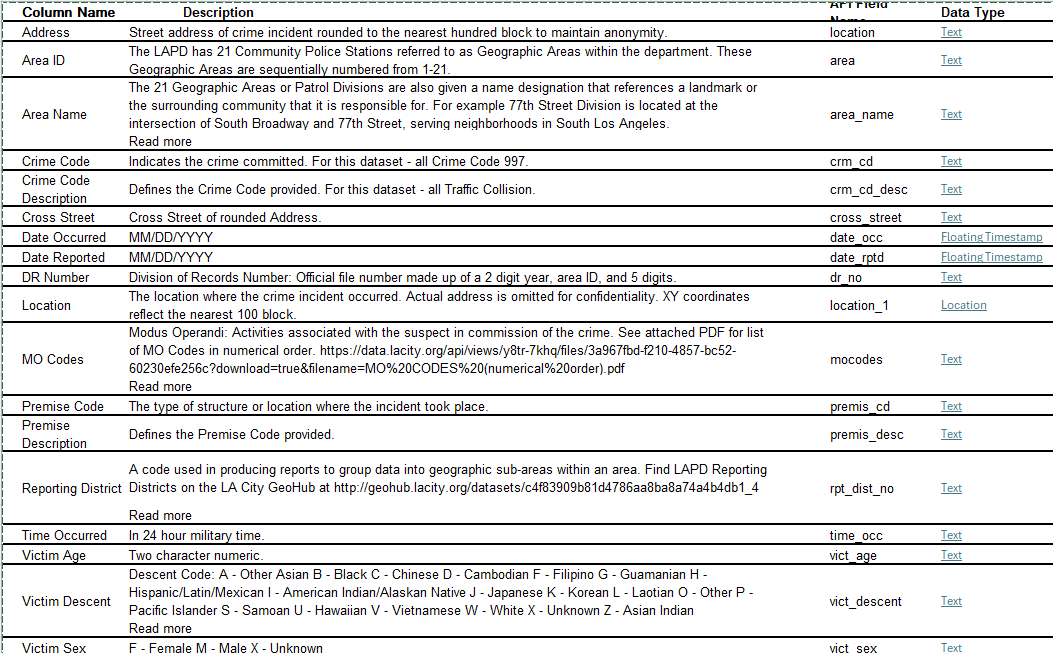

# 1.3 Get 'Year'

In [38]:
df['DateOccurred'] = pd.to_datetime(df['DateOccurred'])
df['DateReported'] = pd.to_datetime(df['DateReported'])
df['ReportingDelay'] = (df['DateReported'] - df['DateOccurred']).dt.total_seconds() / 3600 / 24 # delay in hours

In [39]:
df['ReportingDelay'].describe()

count    443066.000000
mean          2.735775
std          41.960028
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        4019.000000
Name: ReportingDelay, dtype: float64

In [40]:
same_day_count = (df['ReportingDelay'] == 0).sum()
total_count = len(df)
same_day_percentage = (same_day_count / total_count) * 100

print(f"Number of same-day reports: {same_day_count}")
print(f"Percentage of same-day reports: {same_day_percentage:.2f}%")

Number of same-day reports: 311961
Percentage of same-day reports: 70.41%


In [41]:
df['DateOccurred'] = pd.to_datetime(df['DateOccurred'], format='%m/%d/%Y')

df['Year'] = df['DateOccurred'].dt.year

yearly_data_count = df.groupby('Year').size()

print(yearly_data_count)

Year
2010     6341
2011     7824
2012    34096
2013    36795
2014    38183
2015    42243
2016    45924
2017    47158
2018    47102
2019    48959
2020    36249
2021    16434
2022    14397
2023    14364
2024     6997
dtype: int64


# 1.3 Sampling

In [43]:
df2023 = df[(df['Year'] == 2023)]
print(df2023.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14364 entries, 73927 to 610260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DRNumber           14364 non-null  int64         
 1   DateReported       14364 non-null  datetime64[ns]
 2   DateOccurred       14364 non-null  datetime64[ns]
 3   TimeOccurred       14364 non-null  int64         
 4   AreaID             14364 non-null  int64         
 5   ReportingDistrict  14364 non-null  int64         
 6   MOCodes            14364 non-null  object        
 7   VictimAge          14364 non-null  float64       
 8   VictimSex          14364 non-null  object        
 9   VictimDescent      14364 non-null  object        
 10  PremiseCode        14364 non-null  int32         
 11  Location           14364 non-null  object        
 12  ReportingDelay     14364 non-null  float64       
 13  Year               14364 non-null  int32         
dtypes: dat

In [47]:
sample_df = df2023.sample(n=10000, replace=False, random_state=42)
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 607154 to 581480
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DRNumber           10000 non-null  int64         
 1   DateReported       10000 non-null  datetime64[ns]
 2   DateOccurred       10000 non-null  datetime64[ns]
 3   TimeOccurred       10000 non-null  int64         
 4   AreaID             10000 non-null  int64         
 5   ReportingDistrict  10000 non-null  int64         
 6   MOCodes            10000 non-null  object        
 7   VictimAge          10000 non-null  float64       
 8   VictimSex          10000 non-null  object        
 9   VictimDescent      10000 non-null  object        
 10  PremiseCode        10000 non-null  int32         
 11  Location           10000 non-null  object        
 12  ReportingDelay     10000 non-null  float64       
 13  Year               10000 non-null  int32         
dtypes: da

In [48]:
sample_df.head(3)

,DRNumber,DateReported,DateOccurred,TimeOccurred,AreaID,ReportingDistrict,MOCodes,VictimAge,VictimSex,VictimDescent,PremiseCode,Location,ReportingDelay,Year
607154,231814077,2023-07-28,2023-07-28,520,18,1834,3004 3028 3030 4025,31.0,M,H,101,"(33.9398, -118.2611)",0.0,2023
593016,231805464,2023-01-30,2023-01-29,2130,18,1824,0605 3006 3028 3030 3033 3034 3037 3101 4013,41.0,F,H,101,"(33.947, -118.2594)",1.0,2023
608010,231216954,2023-08-03,2023-08-02,5,12,1252,3006 3028 4012 3030,30.0,F,B,101,"(33.971, -118.3223)",1.0,2023


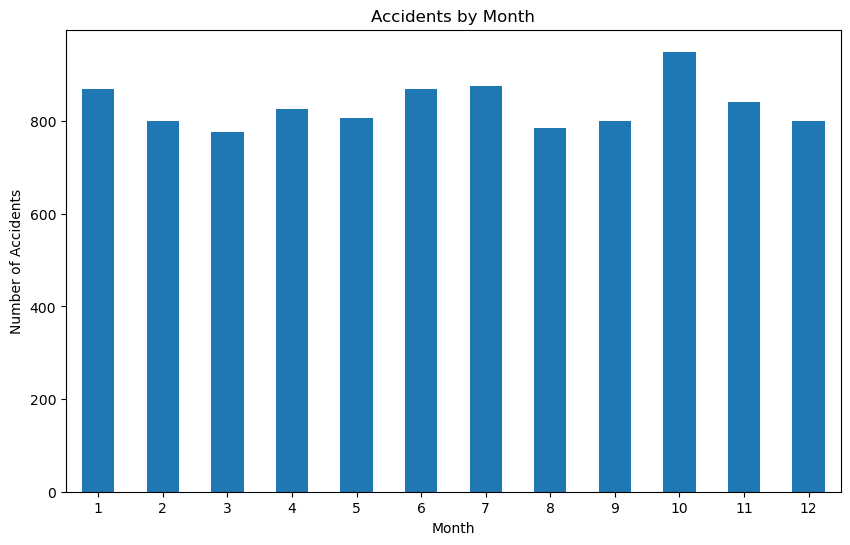

In [49]:
sample_df['Month'] = sample_df['DateOccurred'].dt.month

monthly_counts = sample_df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Month')
plt.xticks(rotation=0)
plt.show()

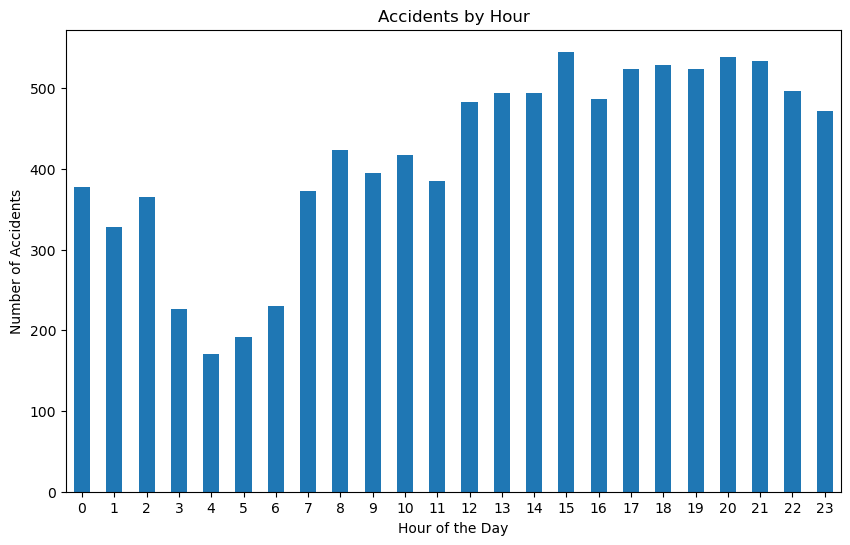

In [51]:
sample_df['TimeOccurred'] = sample_df['TimeOccurred'].astype(str).str.zfill(4)
sample_df['Hour'] = sample_df['TimeOccurred'].str[:2].astype(int)
hourly_counts = sample_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour')
plt.xticks(rotation=0)
plt.show()

In [92]:
sample_df = pd.read_csv('Traffic_Collision_Data_2023_Sample10000B.csv')
print(sample_df.info())
sample_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DayOfWeek           10000 non-null  int64 
 1   Date Reported       10000 non-null  object
 2   Date Occurred       10000 non-null  object
 3   Time Occurred       10000 non-null  int64 
 4   Area ID             10000 non-null  int64 
 5   Reporting District  10000 non-null  int64 
 6   MO Codes            10000 non-null  object
 7   Victim Age          10000 non-null  int64 
 8   Victim Sex          10000 non-null  object
 9   Victim Descent      10000 non-null  object
 10  Premise Code        10000 non-null  int64 
 11  DR Number           10000 non-null  int64 
 12  MonthOccurred       10000 non-null  int64 
 13  HourOccurred        10000 non-null  int64 
 14  ReportingDelay      10000 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.1+ MB
None


,DayOfWeek,Date Reported,Date Occurred,Time Occurred,Area ID,Reporting District,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,DR Number,MonthOccurred,HourOccurred,ReportingDelay
0,6,2023-08-25 00:00:00,2023-08-25 00:00:00,230,11,1153,3006 3030 3101 0605 3401 3701 4011 3037 3028 3033,37,M,H,101,231112652,8,2,0
1,5,2023-08-04 00:00:00,2023-07-13 00:00:00,750,15,1591,3004 3028 4026 3030 3033 3035,63,F,W,101,231513085,7,7,22
2,6,2023-08-12 00:00:00,2023-08-11 00:00:00,2235,1,142,3401 3701 3004 0605 3025 3029 3033 3036 3101 4024,61,M,H,101,230117723,8,22,1


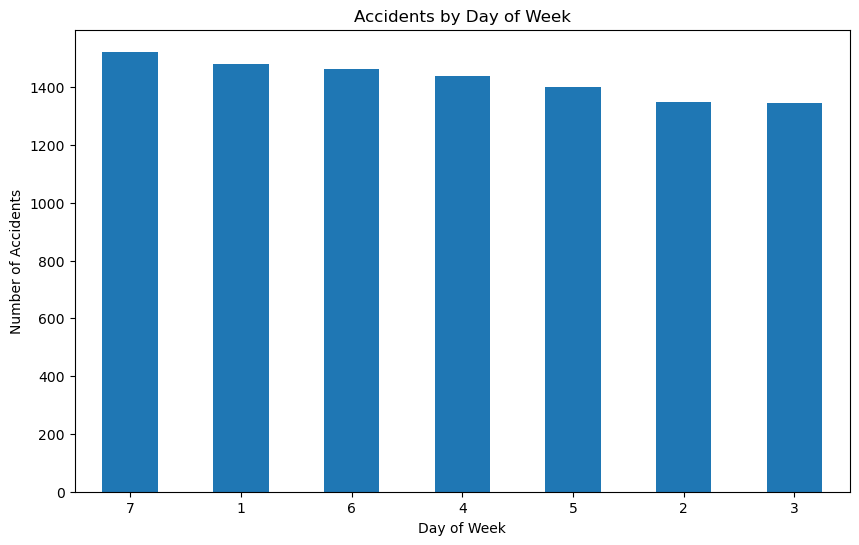

In [93]:
plt.figure(figsize=(10, 6))
sample_df['DayOfWeek'].value_counts().plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of Week')
plt.xticks(rotation=0)
plt.show()

In [94]:
from collections import defaultdict

In [95]:
mo_counts = defaultdict(int)

for mo_codes in sample_df['MO Codes']:
    if pd.notna(mo_codes):  # ensure is not NA
        codes = mo_codes.split()  # split
        for code in codes:
            mo_counts[code] += 1
            
for code, count in mo_counts.items():
    print(f"MO Code {code}: {count} occurrences")            

MO Code 3006: 1949 occurrences
MO Code 3030: 2389 occurrences
MO Code 3101: 8484 occurrences
MO Code 0605: 2790 occurrences
MO Code 3401: 4834 occurrences
MO Code 3701: 4822 occurrences
MO Code 4011: 159 occurrences
MO Code 3037: 6114 occurrences
MO Code 3028: 4778 occurrences
MO Code 3033: 2886 occurrences
MO Code 3004: 4707 occurrences
MO Code 4026: 2436 occurrences
MO Code 3035: 2328 occurrences
MO Code 3025: 1228 occurrences
MO Code 3029: 2597 occurrences
MO Code 3036: 2951 occurrences
MO Code 4024: 2118 occurrences
MO Code 3039: 841 occurrences
MO Code 4002: 106 occurrences
MO Code 3003: 1242 occurrences
MO Code 1218: 212 occurrences
MO Code 3005: 13 occurrences
MO Code 3034: 3217 occurrences
MO Code 3102: 321 occurrences
MO Code 3024: 1116 occurrences
MO Code 0947: 79 occurrences
MO Code 4027: 1793 occurrences
MO Code 4009: 166 occurrences
MO Code 3038: 428 occurrences
MO Code 3602: 540 occurrences
MO Code 3026: 2579 occurrences
MO Code 3011: 1142 occurrences
MO Code 3012: 84 occ

In [96]:
num_codes = len(mo_counts)
print(f"\nTotal number of different MO Codes: {num_codes}")


Total number of different MO Codes: 105


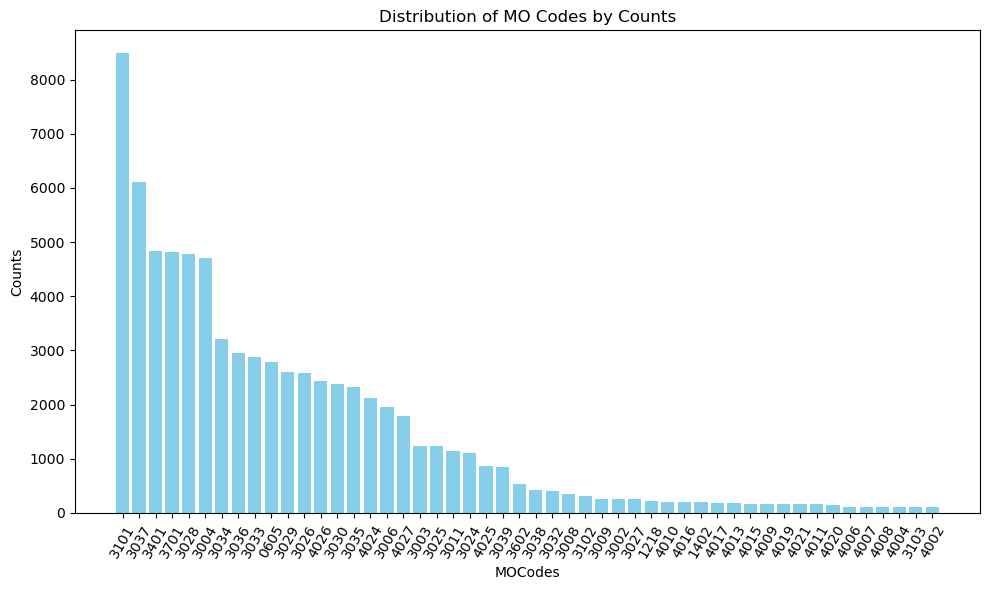

In [97]:
sorted_counts = {k: v for k, v in sorted(mo_counts.items(), key=lambda item: item[1], reverse=True)}

codes = list(sorted_counts.keys())[:50]
counts = list(sorted_counts.values())[:50]

plt.figure(figsize=(10, 6))
plt.bar(codes, counts, color='skyblue')
plt.xlabel('MOCodes')
plt.ylabel('Counts')
plt.title('Distribution of MO Codes by Counts')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [98]:
sorted_counts

{'3101': 8484,
 '3037': 6114,
 '3401': 4834,
 '3701': 4822,
 '3028': 4778,
 '3004': 4707,
 '3034': 3217,
 '3036': 2951,
 '3033': 2886,
 '0605': 2790,
 '3029': 2597,
 '3026': 2579,
 '4026': 2436,
 '3030': 2389,
 '3035': 2328,
 '4024': 2118,
 '3006': 1949,
 '4027': 1793,
 '3003': 1242,
 '3025': 1228,
 '3011': 1142,
 '3024': 1116,
 '4025': 873,
 '3039': 841,
 '3602': 540,
 '3038': 428,
 '3032': 409,
 '3008': 359,
 '3102': 321,
 '3009': 258,
 '3002': 257,
 '3027': 253,
 '1218': 212,
 '4010': 196,
 '4016': 195,
 '1402': 194,
 '4017': 186,
 '4013': 181,
 '4015': 168,
 '4009': 166,
 '4019': 162,
 '4021': 160,
 '4011': 159,
 '4020': 154,
 '4006': 113,
 '4007': 112,
 '4008': 111,
 '4004': 110,
 '3103': 108,
 '4002': 106,
 '4001': 105,
 '4014': 104,
 '3064': 85,
 '3012': 84,
 '0947': 79,
 '4012': 71,
 '3104': 59,
 '4005': 48,
 '4018': 47,
 '3013': 46,
 '2004': 44,
 '3601': 38,
 '4003': 34,
 '3001': 28,
 '3014': 23,
 '3063': 21,
 '3501': 18,
 '3015': 17,
 '3018': 14,
 '3005': 13,
 '3007': 13,
 '3

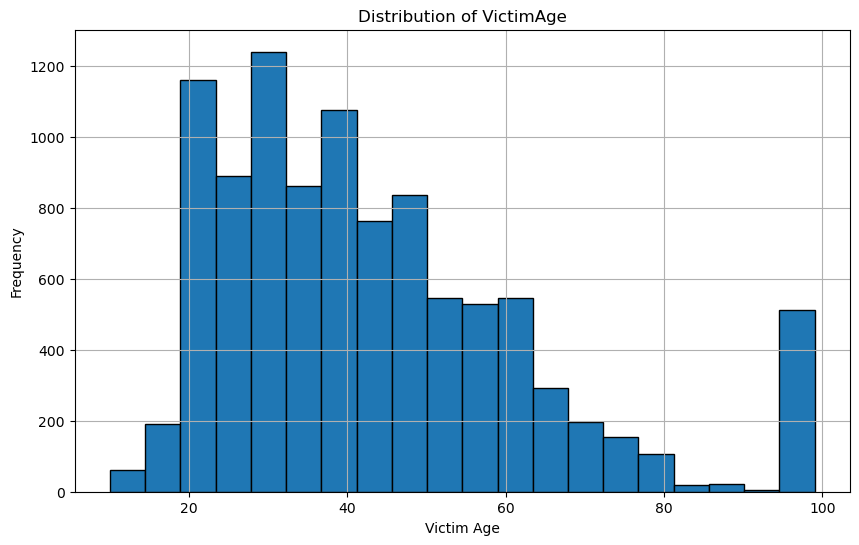

In [99]:
df_filtered = sample_df.dropna(subset=['Victim Age', 'Victim Sex'])

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Victim Age'], bins=20, edgecolor='black')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Distribution of VictimAge')
plt.grid(True)
plt.show()

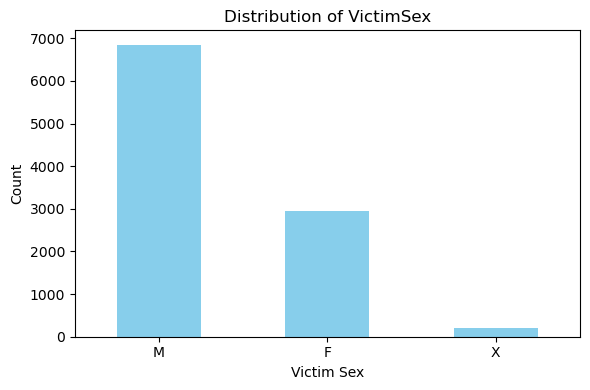

In [100]:
plt.figure(figsize=(6, 4))
df_filtered['Victim Sex'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.title('Distribution of VictimSex')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [101]:
sample_df["Premise Code"].value_counts()

Premise Code
101    9430
108     263
102     195
103      35
104      24
110      14
105       7
710       5
501       5
301       4
116       4
121       4
212       3
126       2
406       1
215       1
109       1
107       1
707       1
Name: count, dtype: int64

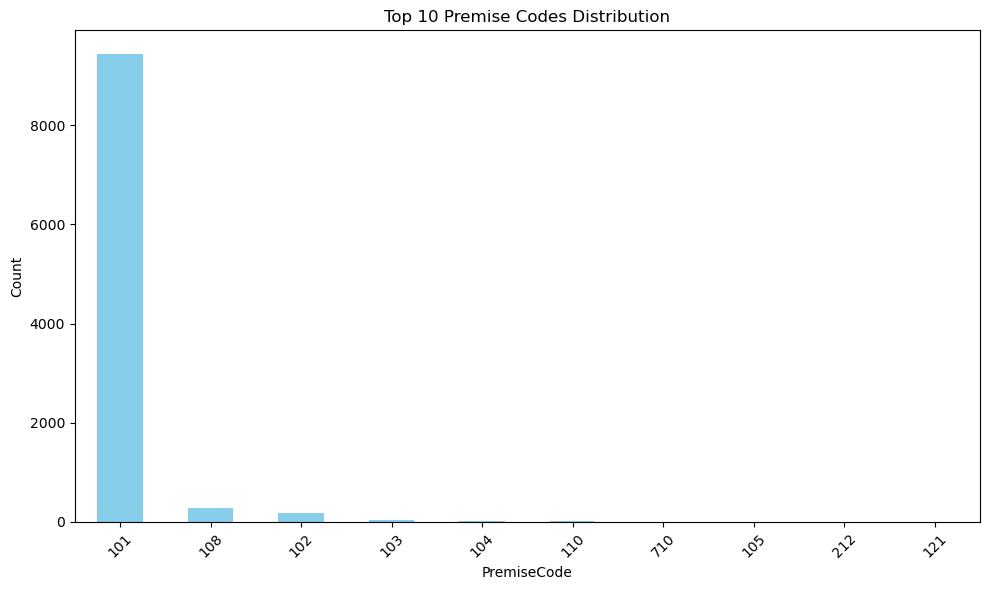

In [62]:
df_filtered = sample_df.dropna(subset=['PremiseCode'])
top_10_premises = df_filtered['PremiseCode'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_premises.plot(kind='bar', color='skyblue')
plt.xlabel('PremiseCode')
plt.ylabel('Count')
plt.title('Top 10 Premise Codes Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

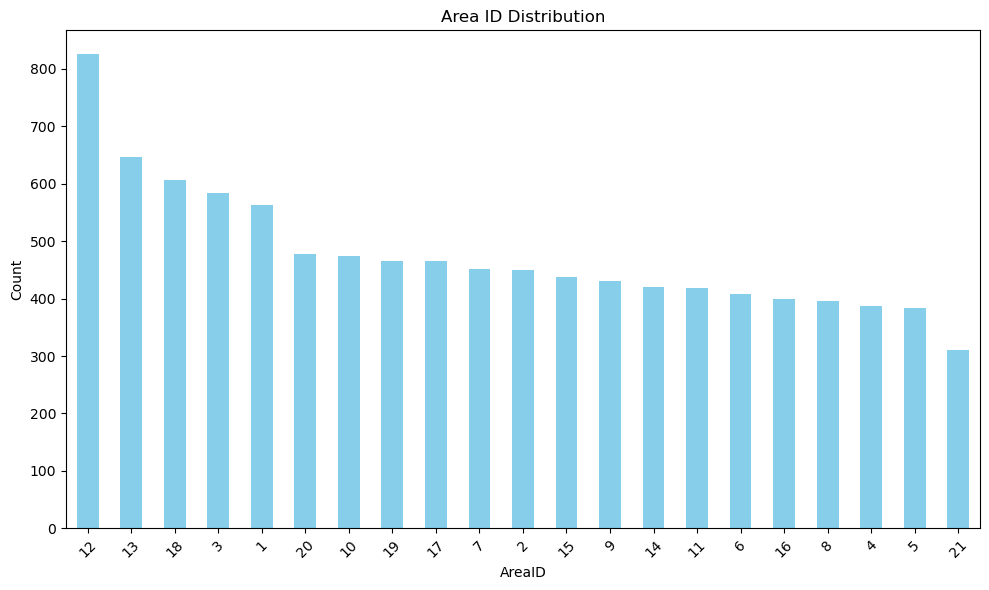

In [64]:
df_filtered = sample_df.dropna(subset=['AreaID'])

area_id_counts = df_filtered['AreaID'].value_counts()

plt.figure(figsize=(10, 6))
area_id_counts.plot(kind='bar', color='skyblue')
plt.xlabel('AreaID')
plt.ylabel('Count')
plt.title('Area ID Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
area_id_counts

AreaID
12    826
13    647
18    606
3     584
1     563
20    477
10    474
19    466
17    465
7     452
2     449
15    438
9     431
14    420
11    418
6     408
16    399
8     395
4     388
5     383
21    311
Name: count, dtype: int64

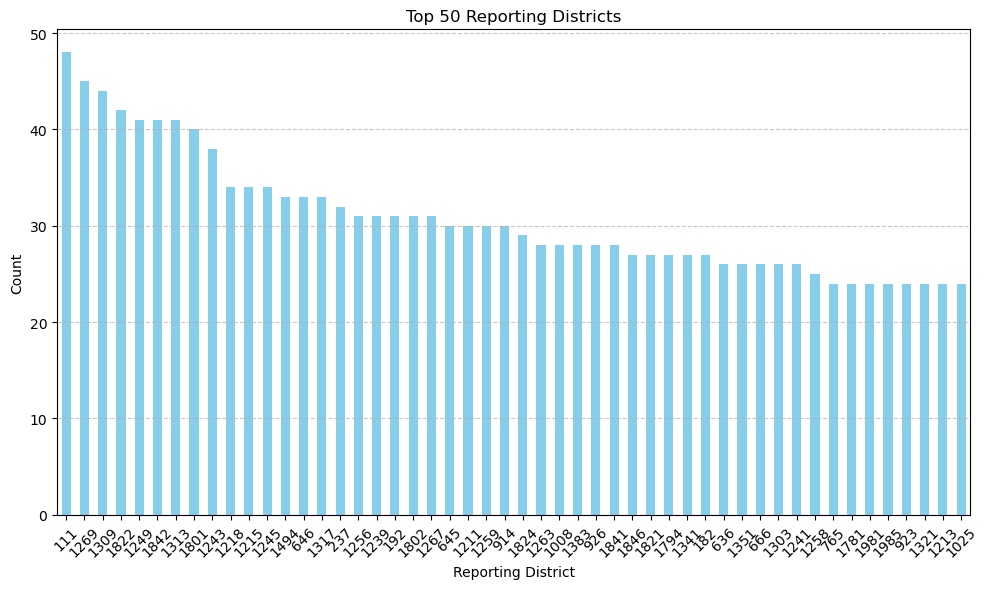

In [70]:
district_counts = sample_df['ReportingDistrict'].value_counts().sort_values(ascending=False)

top_30_districts = district_counts.head(50)

plt.figure(figsize=(10, 6))
top_30_districts.plot(kind='bar', color='skyblue')
plt.title('Top 50 Reporting Districts')
plt.xlabel('Reporting District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [71]:
district_counts.count()

1106

In [72]:
top_30_districts

ReportingDistrict
111     48
1269    45
1309    44
1822    42
1249    41
1842    41
1313    41
1801    40
1243    38
1218    34
1215    34
1245    34
1494    33
646     33
1317    33
237     32
1256    31
1239    31
192     31
1802    31
1267    31
645     30
1211    30
1259    30
914     30
1824    29
1263    28
1008    28
1383    28
926     28
1841    28
1846    27
1821    27
1794    27
1341    27
182     27
636     26
1351    26
666     26
1303    26
1241    26
1258    25
765     24
1781    24
1981    24
1985    24
923     24
1321    24
1213    24
1025    24
Name: count, dtype: int64

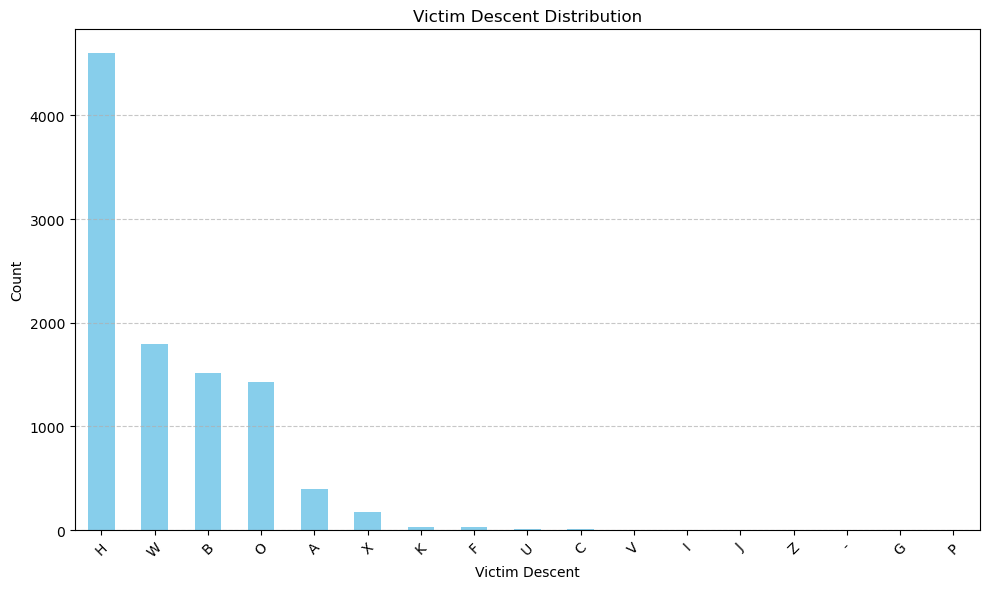

In [67]:
descent_counts = sample_df['VictimDescent'].value_counts()

plt.figure(figsize=(10, 6))
descent_counts.plot(kind='bar', color='skyblue')
plt.title('Victim Descent Distribution')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

In [19]:
def categorize_collision(mo_codes):
    if '3024' in mo_codes or '3025' in mo_codes:
        return 'Injury'
    elif '3029' in mo_codes or '3030' in mo_codes:
        return 'Hit and Run'
    elif '3039' in mo_codes:
        return 'DUI'
    elif '3028' in mo_codes:
        return 'Non Injury'
    else:
        return 'Other'

sample_df['collision_category'] = sample_df['MOCodes'].apply(categorize_collision)

,DRNumber,DateReported,DateOccurred,TimeOccurred,AreaID,ReportingDistrict,MOCodes,VictimAge,VictimSex,VictimDescent,PremiseCode,Location,reporting_delay,delay_days
0,190319651,2019-08-24,2019-08-24,450,3,356,3036 3004 3026 3101 4003,22.0,M,H,101,"(34.0255, -118.3002)",0.0,0.0
1,190319680,2019-08-30,2019-08-30,2320,3,355,3037 3006 3028 3030 3039 3101 4003,30.0,F,H,101,"(34.0256, -118.3089)",0.0,0.0


In [20]:
df.columns

Index(['DRNumber', 'DateReported', 'DateOccurred', 'TimeOccurred', 'AreaID',
       'ReportingDistrict', 'MOCodes', 'VictimAge', 'VictimSex',
       'VictimDescent', 'PremiseCode', 'Location', 'reporting_delay',
       'delay_days'],
      dtype='object')

In [22]:
columns2 = ['DRNumber', 'AreaID', 'ReportingDistrict', 
           'MOCodes', 'VictimAge', 'VictimSex', 'VictimDescent',
           'PremiseCode', 'Year', 'Month', 'Hour']

<class 'pandas.core.frame.DataFrame'>
Index: 14364 entries, 73927 to 610260
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DRNumber           14364 non-null  int64  
 1   AreaID             14364 non-null  int64  
 2   ReportingDistrict  14364 non-null  int64  
 3   MOCodes            14364 non-null  object 
 4   VictimAge          14364 non-null  float64
 5   VictimSex          14364 non-null  object 
 6   VictimDescent      14364 non-null  object 
 7   PremiseCode        14364 non-null  int32  
 8   Year               14364 non-null  int32  
 9   Month              14364 non-null  int32  
 10  Hour               14364 non-null  int32  
dtypes: float64(1), int32(4), int64(3), object(3)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 14364 entries, 73927 to 610260
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             ---------

In [24]:
df1

,DRNumber,AreaID,ReportingDistrict,MOCodes,VictimAge,VictimSex,VictimDescent,PremiseCode,Year,Month,Hour
73927,231112652,11,1153,3006 3030 3101 0605 3401 3701 4011 3037 3028 3033,37.0,M,H,101,2023,8,2
73977,231513085,15,1591,3004 3028 4026 3030 3033 3035,63.0,F,W,101,2023,7,7
76184,230117723,1,142,3401 3701 3004 0605 3025 3029 3033 3036 3101 4024,61.0,M,H,101,2023,8,22
76244,230215058,2,246,3006 0605 3028 3033 3037 3039 3101 3401 3701 4002,40.0,M,H,101,2023,8,22
76274,230314669,3,396,4025 3025 3029 3003,24.0,F,H,101,2023,8,1
...,...,...,...,...,...,...,...,...,...,...,...
610012,241511632,15,1531,3004 3028 4026 3030 3033 3035 3037,25.0,F,W,101,2023,11,8
610025,230818071,8,849,3035 3101 3401 3701 3037 3006 3028 3039 4008,22.0,M,W,101,2023,12,23
610027,231714536,17,1795,3004 3028 4026 3030 3033 3035,55.0,M,W,101,2023,7,19
610226,240408407,4,468,0605 4024,20.0,M,H,101,2023,11,17


In [25]:
for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"{column}: {unique_values}")

DRNumber: [231112652 231513085 230117723 ... 231714536 240408407 241310957]
AreaID: [11 15  1  2  3  4  6  8  9 10 12 13 16 17 18 19 20 21 14  7  5]
ReportingDistrict: [1153 1591  142 ... 1773 1979 1498]
MOCodes: ['3006 3030 3101 0605 3401 3701 4011 3037 3028 3033'
 '3004 3028 4026 3030 3033 3035'
 '3401 3701 3004 0605 3025 3029 3033 3036 3101 4024' ...
 '3011 3035 3037 3101 3401 3701 3006 3028 3030 4027'
 '4014 3036 3101 3030 3028 3011 3034 3401 3701 3033'
 '3035 3101 3401 3701 3037 3006 3028 3039 4008']
VictimAge: [37. 63. 61. 40. 24. 57. 47. 23. 45. 44. 31. 70. 30. 21. 99. 51. 22. 33.
 76. 42. 67. 59. 64. 27. 34. 29. 25. 32. 41. 28. 49. 52. 48. 53. 26. 50.
 58. 18. 39. 38. 20. 19. 35. 54. 75. 36. 85. 83. 43. 60. 78. 46. 65. 56.
 15. 62. 55. 66. 12. 13. 77. 72. 71. 73. 16. 81. 17. 11. 88. 69. 80. 74.
 68. 79. 89. 14. 10. 84. 87. 91. 94. 90. 98. 86. 82. 95. 92. 93.]
VictimSex: ['M' 'F' 'X' 'H' '-']
VictimDescent: ['H' 'W' 'O' 'B' 'F' 'A' 'X' 'K' 'J' 'I' 'V' 'C' 'U' 'Z' 'P' 'G' '-']
Pr

In [26]:
df1['VictimSex'].value_counts()

VictimSex
M    9820
F    4273
X     264
H       6
-       1
Name: count, dtype: int64

In [27]:
df1['VictimDescent'].value_counts()

VictimDescent
H    6572
W    2629
B    2120
O    2115
A     552
X     259
F      41
K      34
C      16
U       9
I       4
V       4
J       3
Z       2
P       2
G       1
-       1
Name: count, dtype: int64

In [28]:
df1[df1['VictimDescent']=='-']

,DRNumber,AreaID,ReportingDistrict,MOCodes,VictimAge,VictimSex,VictimDescent,PremiseCode,Year,Month,Hour
608195,231415415,14,1412,3011 3028,22.0,-,-,101,2023,8,1


In [29]:
duplicates = df1[df1.duplicated('DRNumber', keep=False)]
duplicates

,DRNumber,AreaID,ReportingDistrict,MOCodes,VictimAge,VictimSex,VictimDescent,PremiseCode,Year,Month,Hour


In [30]:
# df2 = df1[(df1['VictimDescent'] != '-') & (df1['VictimSex'].isin(['M', 'F', 'X']))]
df2 = df1[df1['VictimSex'].isin(['M', 'F', 'X'])]
print(df2.info())
# df2['MOCodesSplit'] = df2['MOCodes'].str.split()
df2 = df2.assign(MOCodesSplit=df2['MOCodes'].str.split())
df2

<class 'pandas.core.frame.DataFrame'>
Index: 14357 entries, 73927 to 610260
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DRNumber           14357 non-null  int64  
 1   AreaID             14357 non-null  int64  
 2   ReportingDistrict  14357 non-null  int64  
 3   MOCodes            14357 non-null  object 
 4   VictimAge          14357 non-null  float64
 5   VictimSex          14357 non-null  object 
 6   VictimDescent      14357 non-null  object 
 7   PremiseCode        14357 non-null  int32  
 8   Year               14357 non-null  int32  
 9   Month              14357 non-null  int32  
 10  Hour               14357 non-null  int32  
dtypes: float64(1), int32(4), int64(3), object(3)
memory usage: 1.1+ MB
None


,DRNumber,AreaID,ReportingDistrict,MOCodes,VictimAge,VictimSex,VictimDescent,PremiseCode,Year,Month,Hour,MOCodesSplit
73927,231112652,11,1153,3006 3030 3101 0605 3401 3701 4011 3037 3028 3033,37.0,M,H,101,2023,8,2,"[3006, 3030, 3101, 0605, 3401, 3701, 4011, 303..."
73977,231513085,15,1591,3004 3028 4026 3030 3033 3035,63.0,F,W,101,2023,7,7,"[3004, 3028, 4026, 3030, 3033, 3035]"
76184,230117723,1,142,3401 3701 3004 0605 3025 3029 3033 3036 3101 4024,61.0,M,H,101,2023,8,22,"[3401, 3701, 3004, 0605, 3025, 3029, 3033, 303..."
76244,230215058,2,246,3006 0605 3028 3033 3037 3039 3101 3401 3701 4002,40.0,M,H,101,2023,8,22,"[3006, 0605, 3028, 3033, 3037, 3039, 3101, 340..."
76274,230314669,3,396,4025 3025 3029 3003,24.0,F,H,101,2023,8,1,"[4025, 3025, 3029, 3003]"
...,...,...,...,...,...,...,...,...,...,...,...,...
610012,241511632,15,1531,3004 3028 4026 3030 3033 3035 3037,25.0,F,W,101,2023,11,8,"[3004, 3028, 4026, 3030, 3033, 3035, 3037]"
610025,230818071,8,849,3035 3101 3401 3701 3037 3006 3028 3039 4008,22.0,M,W,101,2023,12,23,"[3035, 3101, 3401, 3701, 3037, 3006, 3028, 303..."
610027,231714536,17,1795,3004 3028 4026 3030 3033 3035,55.0,M,W,101,2023,7,19,"[3004, 3028, 4026, 3030, 3033, 3035]"
610226,240408407,4,468,0605 4024,20.0,M,H,101,2023,11,17,"[0605, 4024]"


In [32]:
unique_mocodes = set(code for codes in sample_df['MOCodesSplit'] for code in codes if code.isdigit())
print(len(unique_mocodes))
print(unique_mocodes)

119
{'3034', '4024', '3008', '1419', '3035', '4026', '3038', '3063', '1309', '0432', '3602', '4004', '4008', '0605', '3012', '3003', '2028', '0422', '4012', '0443', '3002', '3040', '3001', '0329', '3036', '2042', '4009', '0604', '4019', '4014', '1300', '3101', '4002', '3601', '0216', '3015', '0325', '1026', '3062', '1407', '3026', '3017', '3006', '0601', '4027', '3104', '2024', '4025', '3022', '3032', '1420', '3021', '0328', '3401', '1218', '3102', '3025', '1313', '4003', '0906', '0910', '3004', '4001', '1501', '3020', '3027', '4006', '4010', '0416', '3064', '3010', '3501', '2303', '3037', '1822', '0352', '2004', '4013', '2029', '0401', '3103', '3028', '3019', '4011', '3039', '1402', '3024', '1409', '2002', '3030', '4018', '3029', '4021', '3007', '3011', '3023', '2021', '3033', '1025', '4007', '3014', '4016', '3701', '3016', '0947', '2030', '0907', '2018', '0913', '4015', '3018', '1816', '3013', '3009', '4017', '2038', '4020', '3005', '4005'}


In [34]:
# Create an empty dataframe to save the new columns
new_columns = {}

# One-hot encoding for each MOCodes
for code in unique_mocodes:
    new_columns[f'MOCodes{code}'] = sample_df['MOCodes'].apply(lambda x: 1 if str(code) in x else 0)

# Add the new columns to original dataframe
sample_df_MOCodes = pd.concat([sample_df, pd.DataFrame(new_columns)], axis=1)

# Remove unnecessary columns
sample_df_MOCodes = sample_df_MOCodes.drop(['MOCodesSplit', 'MOCodes','Year'], axis=1)

sample_df_MOCodes

,DRNumber,AreaID,ReportingDistrict,VictimAge,VictimSex,VictimDescent,PremiseCode,Month,Hour,MOCodes3034,...,MOCodes4015,MOCodes3018,MOCodes1816,MOCodes3013,MOCodes3009,MOCodes4017,MOCodes2038,MOCodes4020,MOCodes3005,MOCodes4005
604661,231412211,14,1444,28.0,M,W,101,6,2,0,...,0,0,0,0,0,0,0,0,0,0
603383,231910448,19,1983,50.0,M,O,101,6,21,1,...,0,0,0,0,0,0,0,0,0,0
593313,231604929,16,1654,99.0,X,X,101,1,13,1,...,0,0,0,0,0,0,0,0,0,0
599426,231210589,12,1213,64.0,M,H,101,4,12,0,...,0,0,0,0,0,0,0,0,0,0
602522,231109522,11,1138,41.0,M,A,101,5,13,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605415,230610783,6,666,22.0,M,H,101,6,2,0,...,0,0,0,0,0,0,0,0,0,0
591791,231805130,18,1842,38.0,F,H,101,1,18,0,...,0,0,0,0,0,0,0,0,0,0
585860,231815695,18,1802,43.0,M,B,101,8,0,0,...,0,0,0,0,0,0,0,0,0,0
581156,231012722,10,1021,22.0,M,W,101,8,18,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
print(sample_df_MOCodes.columns)

Index(['DRNumber', 'AreaID', 'ReportingDistrict', 'VictimAge', 'VictimSex',
       'VictimDescent', 'PremiseCode', 'Month', 'Hour', 'MOCodes3034',
       ...
       'MOCodes4015', 'MOCodes3018', 'MOCodes1816', 'MOCodes3013',
       'MOCodes3009', 'MOCodes4017', 'MOCodes2038', 'MOCodes4020',
       'MOCodes3005', 'MOCodes4005'],
      dtype='object', length=128)


In [36]:
def categorize_hour(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [37]:
sample_df_MOCodes['TimeOfDay'] = sample_df_MOCodes['Hour'].apply(categorize_hour)

print(sample_df_MOCodes[['DRNumber', 'TimeOfDay']])

         DRNumber  TimeOfDay
604661  231412211      Night
603383  231910448    Evening
593313  231604929  Afternoon
599426  231210589  Afternoon
602522  231109522  Afternoon
...           ...        ...
605415  230610783      Night
591791  231805130    Evening
585860  231815695      Night
581156  231012722    Evening
103412  231217674      Night

[10000 rows x 2 columns]


In [38]:
sample_df_MOCodes = sample_df_MOCodes.drop(['Hour'], axis=1)
print(sample_df_MOCodes.columns)

Index(['DRNumber', 'AreaID', 'ReportingDistrict', 'VictimAge', 'VictimSex',
       'VictimDescent', 'PremiseCode', 'Month', 'MOCodes3034', 'MOCodes4024',
       ...
       'MOCodes3018', 'MOCodes1816', 'MOCodes3013', 'MOCodes3009',
       'MOCodes4017', 'MOCodes2038', 'MOCodes4020', 'MOCodes3005',
       'MOCodes4005', 'TimeOfDay'],
      dtype='object', length=128)


In [39]:
sample_df_MOCodes_TimeOfDay = pd.get_dummies(sample_df_MOCodes, columns=['TimeOfDay'], drop_first=True)
print(sample_df_MOCodes_TimeOfDay.columns)

Index(['DRNumber', 'AreaID', 'ReportingDistrict', 'VictimAge', 'VictimSex',
       'VictimDescent', 'PremiseCode', 'Month', 'MOCodes3034', 'MOCodes4024',
       ...
       'MOCodes3013', 'MOCodes3009', 'MOCodes4017', 'MOCodes2038',
       'MOCodes4020', 'MOCodes3005', 'MOCodes4005', 'TimeOfDay_Evening',
       'TimeOfDay_Morning', 'TimeOfDay_Night'],
      dtype='object', length=130)


<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

In [42]:
mocodes_columns = [col for col in sample_df_MOCodes.columns if col.startswith('MOCodes')]
all_columns = ['DRNumber'] + mocodes_columns

In [45]:
sample_df_MOCodes_Cluster = sample_df_MOCodes[all_columns]

In [46]:
X = sample_df_MOCodes_Cluster.drop(['DRNumber'], axis=1)

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

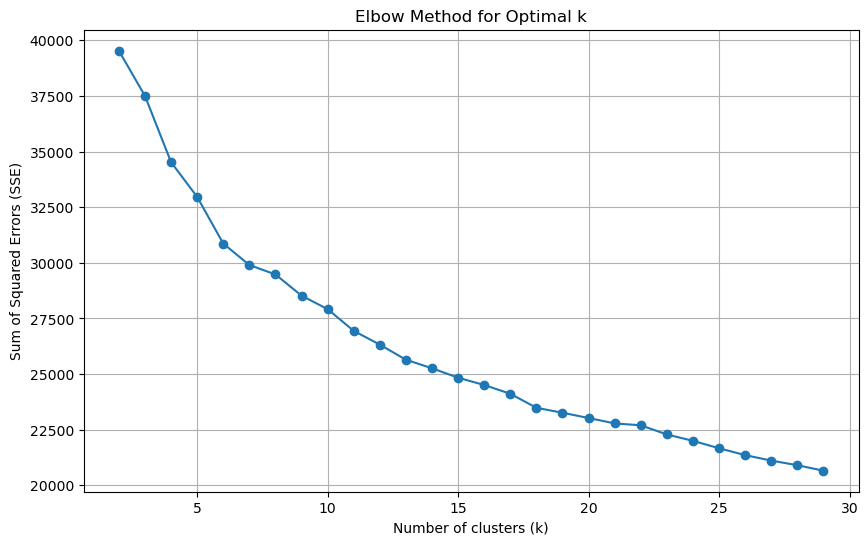

In [47]:
SSE = []
centroid = []
k_range = range(2, 30)  # you can adjust the range as needed
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)  # Inertia is the SSE
    centroid.append(kmeans.cluster_centers_)

# Step 5: Plot the SSE to create the elbow chart
plt.figure(figsize=(10, 6))
plt.plot(k_range, SSE, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [48]:
[*zip(k_range, SSE)]

[(2, 39529.10173881842),
 (3, 37498.27221993591),
 (4, 34521.82132611929),
 (5, 32960.640653768256),
 (6, 30863.907529778233),
 (7, 29901.14085605298),
 (8, 29476.074171083386),
 (9, 28524.57442864505),
 (10, 27916.827587001062),
 (11, 26941.345425305695),
 (12, 26322.616824676737),
 (13, 25645.14746239097),
 (14, 25260.72359443205),
 (15, 24837.814799539006),
 (16, 24509.200054789973),
 (17, 24115.763330541566),
 (18, 23485.898588142267),
 (19, 23262.351632569593),
 (20, 23026.42251413417),
 (21, 22783.59308839592),
 (22, 22699.283264988146),
 (23, 22288.090223293486),
 (24, 22000.389910835253),
 (25, 21667.448318662442),
 (26, 21358.441433782198),
 (27, 21112.706614231443),
 (28, 20905.281672885507),
 (29, 20657.830416485387)]

In [52]:
k_values = list(range(2, 30))

# 计算一阶导数
first_derivative = np.diff(SSE)

# 计算二阶导数
second_derivative = np.diff(first_derivative)

# 找到二阶导数的最小值
best_k = k_values[np.argmin(second_derivative) + 1]

print(f"The best k value is: {best_k}")

The best k value is: 3


In [53]:
second_derivative

array([-945.62137493, 1415.27022147, -535.55245164, 1133.96645026,
        537.69998876, -526.43305747,  343.75290079, -367.73532005,
        356.75356107,  -58.74076166,  293.04549433,  -38.48492693,
         94.29405014,  -64.8219795 , -236.42801815,  406.31778683,
        -12.38216286,   -6.9003073 ,  158.51960233, -326.88321829,
        123.49272924,  -45.24127971,   23.93470729,   63.27206533,
         38.3098782 ,  -40.02631505])

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
max_k = 30  # Set a reasonable upper limit for k

best_k = None
best_silhouette_score = -1

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    print(f"For k={k}, Silhouette Score: {silhouette_avg:.2f}")
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = k

print(f"Best k: {best_k} (Silhouette Score: {best_silhouette_score:.2f})")

For k=2, Silhouette Score: 0.17
For k=3, Silhouette Score: 0.12
For k=4, Silhouette Score: 0.13
For k=5, Silhouette Score: 0.12
For k=6, Silhouette Score: 0.13
For k=7, Silhouette Score: 0.13
For k=8, Silhouette Score: 0.12
For k=9, Silhouette Score: 0.12
For k=10, Silhouette Score: 0.13
For k=11, Silhouette Score: 0.14
For k=12, Silhouette Score: 0.14
For k=13, Silhouette Score: 0.14
For k=14, Silhouette Score: 0.14
For k=15, Silhouette Score: 0.15
For k=16, Silhouette Score: 0.14
For k=17, Silhouette Score: 0.14
For k=18, Silhouette Score: 0.15
For k=19, Silhouette Score: 0.15
For k=20, Silhouette Score: 0.15
For k=21, Silhouette Score: 0.15
For k=22, Silhouette Score: 0.15
For k=23, Silhouette Score: 0.15
For k=24, Silhouette Score: 0.15
For k=25, Silhouette Score: 0.16
For k=26, Silhouette Score: 0.16
For k=27, Silhouette Score: 0.16
For k=28, Silhouette Score: 0.17
For k=29, Silhouette Score: 0.17
For k=30, Silhouette Score: 0.17
Best k: 2 (Silhouette Score: 0.17)


In [91]:
# Create a DataFrame
data = pd.DataFrame({
    "Fruits": ["Apple", "Banana", "Orange", "Grape"],
    "Colors": ["Red", ["Yellow", "Green"], "Orange", ["Purple", "Red"]]
})

# Print the original DataFrame
print(data)

print("\n")
# Explode the "Colors" column
data_exploded = data.explode("Colors")

# Print the exploded DataFrame
print(data_exploded)

   Fruits           Colors
0   Apple              Red
1  Banana  [Yellow, Green]
2  Orange           Orange
3   Grape    [Purple, Red]


   Fruits  Colors
0   Apple     Red
1  Banana  Yellow
1  Banana   Green
2  Orange  Orange
3   Grape  Purple
3   Grape     Red


<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

<table width="100%"><tr><td bgcolor=#00BFF></td></tr></table>

In [102]:
dt_df = pd.read_csv('Traffic_Collision_Data_2023_Sample10000DT.csv')
print(dt_df.info())
dt_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   DayOfWeek           10000 non-null  int64 
 1   Area ID             10000 non-null  int64 
 2   Reporting District  10000 non-null  int64 
 3   Victim Age          10000 non-null  int64 
 4   Victim Sex          10000 non-null  object
 5   Victim Descent      10000 non-null  object
 6   Premise Code        10000 non-null  int64 
 7   DR Number           10000 non-null  int64 
 8   MonthOccurred       10000 non-null  int64 
 9   HourOccurred        10000 non-null  int64 
 10  ReportingDelay      10000 non-null  int64 
 11  InjurySeverity      10000 non-null  object
 12  AtIntersection      10000 non-null  object
 13  CollisionType       10000 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.1+ MB
None


,DayOfWeek,Area ID,Reporting District,Victim Age,Victim Sex,Victim Descent,Premise Code,DR Number,MonthOccurred,HourOccurred,ReportingDelay,InjurySeverity,AtIntersection,CollisionType
0,6,11,1153,37,M,H,101,231112652,8,2,0,0 - No Injury,No,Veh vs Parked Veh
1,5,15,1591,63,F,W,101,231513085,7,7,22,0 - No Injury,Unknown,Veh vs Veh
2,6,1,142,61,M,H,101,230117723,8,22,1,2 - Visible,Yes,Veh vs Veh


In [105]:
dt_df.columns

Index(['DayOfWeek', 'Area ID', 'Reporting District', 'Victim Age',
       'Victim Sex', 'Victim Descent', 'Premise Code', 'DR Number',
       'MonthOccurred', 'HourOccurred', 'ReportingDelay', 'InjurySeverity',
       'AtIntersection ', 'CollisionType'],
      dtype='object')

In [133]:
print(dt_df['Area ID'].value_counts())
dt_df['Area ID'].value_counts().count()

Area ID
13    768
1     634
17    580
19    575
10    564
20    552
15    540
7     533
9     506
16    504
2     481
8     481
11    470
6     436
4     425
14    423
21    399
12    383
3     292
18    282
5     172
Name: count, dtype: int64


21

In [111]:
print(dt_df['Premise Code'].value_counts())
dt_df['Premise Code'].value_counts().count()

Premise Code
101    9430
108     263
102     195
103      35
104      24
110      14
105       7
710       5
501       5
301       4
116       4
121       4
212       3
126       2
406       1
215       1
109       1
107       1
707       1
Name: count, dtype: int64


19

In [115]:
dt_df['Reporting District'].value_counts().count()

1105

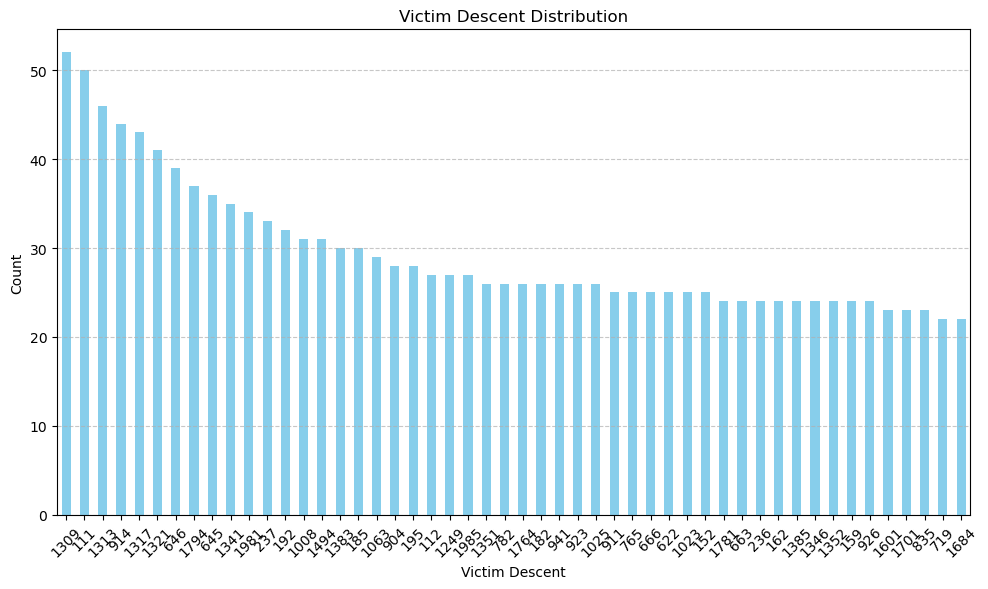

In [116]:
RD_counts = dt_df['Reporting District'].value_counts()[:50]

plt.figure(figsize=(10, 6))
RD_counts.plot(kind='bar', color='skyblue')
plt.title('Victim Descent Distribution')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [119]:
dt_df['Reporting District']

0       1153
1       1591
2        142
3        246
4        421
        ... 
9995    1453
9996    1492
9997    1531
9998     849
9999    1795
Name: Reporting District, Length: 10000, dtype: int64

In [127]:
data = dt_df

In [128]:
freq_encoding = dt_df['Reporting District'].value_counts(normalize=True)

# 对 Reporting District 进行频率编码
data['Reporting District Encoded'] = data['Reporting District'].map(freq_encoding)

# 删除原始的 Reporting District 列
data = data.drop(columns=['Reporting District'])

In [132]:
freq_encoding.value_counts().count()

44